# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [177]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [178]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}") 


Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [179]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}?appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Get the JSON response
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.fromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | dalby
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | giado
Processing Record 4 of Set 1 | bikenibeu village
Processing Record 5 of Set 1 | laojunmiao
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | izazi
Processing Record 10 of Set 1 | baijiantan
Processing Record 11 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | hartsville
Processing Record 14 of Set 1 | vilyuchinsk
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | peniche
Processing Record 17 of Set 1 | zhenlai
Processing Record 18 of Set 1 | fort st. john
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | kaba
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | pet

In [180]:
# Convert the cities weather data into a Pandas DataFrame

# Convert the city data to a DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [181]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dalby,-27.1833,151.2667,50.85,62,0,7.54,AU,2023-05-29 17:59:18
1,blackmans bay,-43.0167,147.3167,55.53,74,100,8.86,AU,2023-05-29 17:59:18
2,giado,31.9582,12.0203,70.07,33,91,13.65,LY,2023-05-29 17:59:18
3,bikenibeu village,1.3673,173.1241,85.96,79,40,5.75,KI,2023-05-29 17:59:19
4,laojunmiao,39.8333,97.7333,50.07,57,15,2.71,CN,2023-05-29 17:59:19


In [182]:
# Export the City_Data to a CSV file in the output_data folder
city_data_df.to_csv("output_data/city_data.csv", index_label="City_ID")


In [183]:
# Read saved data
city_data_df = pd.read_csv("output_data/city_data.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dalby,-27.1833,151.2667,50.85,62,0,7.54,AU,2023-05-29 17:59:18
1,blackmans bay,-43.0167,147.3167,55.53,74,100,8.86,AU,2023-05-29 17:59:18
2,giado,31.9582,12.0203,70.07,33,91,13.65,LY,2023-05-29 17:59:18
3,bikenibeu village,1.3673,173.1241,85.96,79,40,5.75,KI,2023-05-29 17:59:19
4,laojunmiao,39.8333,97.7333,50.07,57,15,2.71,CN,2023-05-29 17:59:19


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

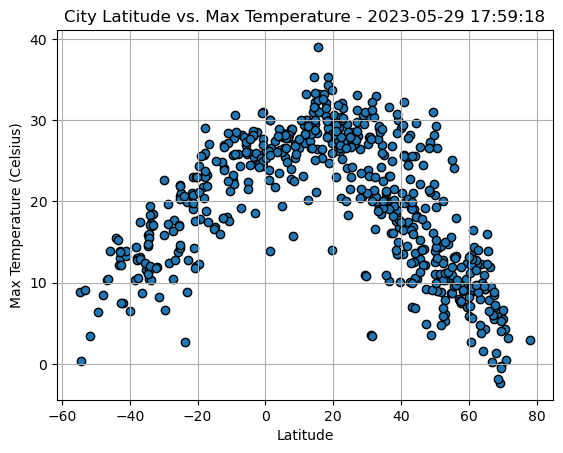

In [184]:
# Convert Max Temperature from Fahrenheit to Celsius
city_data_df["Max Temp (C)"] = (city_data_df["Max Temp"] - 32) * 5/9

# Get the date from the DataFrame
date = city_data_df["Date"].iloc[0]

# Build scatter plot for Latitude vs. Max Temperature in Celsius
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp (C)"], edgecolor="black")

# Set the title and labels
plt.title("City Latitude vs. Max Temperature - " + date)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")

# Set the grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show the plot
plt.show()


#### Latitude Vs. Humidity

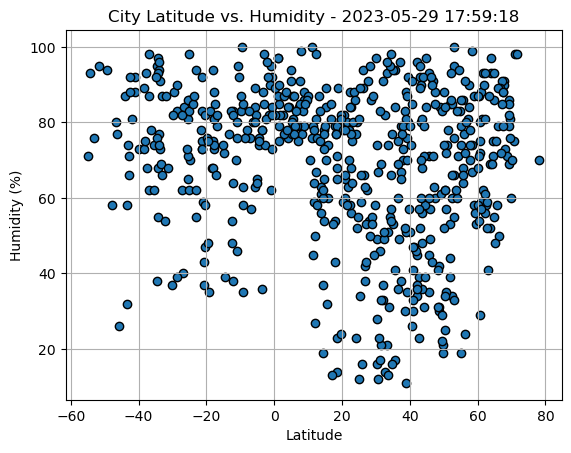

In [185]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Set the title and labels
plt.title("City Latitude vs. Humidity - " + city_data_df["Date"].iloc[0])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set the grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show the plot
plt.show()


#### Latitude Vs. Cloudiness

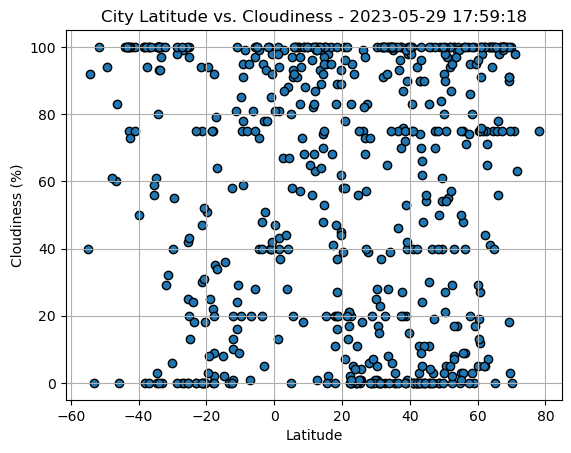

In [186]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Set the title and labels
plt.title("City Latitude vs. Cloudiness - " + city_data_df["Date"].iloc[0])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set the grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show the plot
plt.show()


#### Latitude vs. Wind Speed Plot

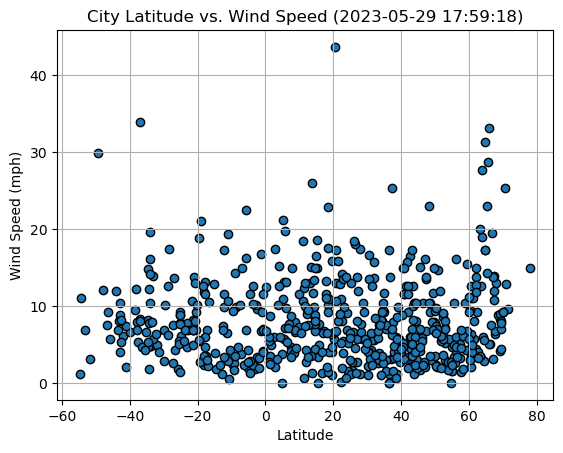

In [187]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Set the title and labels
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set the grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show the plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [188]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, file_name):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create scatter plot and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the equation of the line on the plot
    equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(equation, (min(x_values), min(y_values)), fontsize=12, color="red")
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Save the plot
    plt.savefig(file_name)
    
    # Show the plot
    plt.show()


In [189]:
# Filter the city data for Northern Hemisphere (latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
2,giado,31.9582,12.0203,70.07,33,91,13.65,LY,2023-05-29 17:59:18,21.150000
3,bikenibeu village,1.3673,173.1241,85.96,79,40,5.75,KI,2023-05-29 17:59:19,29.977778
4,laojunmiao,39.8333,97.7333,50.07,57,15,2.71,CN,2023-05-29 17:59:19,10.038889
6,albany,42.6001,-73.9662,82.81,39,11,5.99,US,2023-05-29 17:54:30,28.227778
9,baijiantan,45.6333,85.1833,59.54,35,30,1.63,CN,2023-05-29 17:59:22,15.300000


In [190]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

# Filter the city data for Southern Hemisphere (latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,dalby,-27.1833,151.2667,50.85,62,0,7.54,AU,2023-05-29 17:59:18,10.472222
1,blackmans bay,-43.0167,147.3167,55.53,74,100,8.86,AU,2023-05-29 17:59:18,13.072222
5,ushuaia,-54.8000,-68.3000,47.86,71,40,1.14,AR,2023-05-29 17:59:20,8.811111
7,saint-philippe,-21.3585,55.7679,69.39,75,47,8.16,RE,2023-05-29 17:59:21,20.772222
8,izazi,-7.2000,35.7333,66.61,76,1,3.80,TZ,2023-05-29 17:59:22,19.227778


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.61


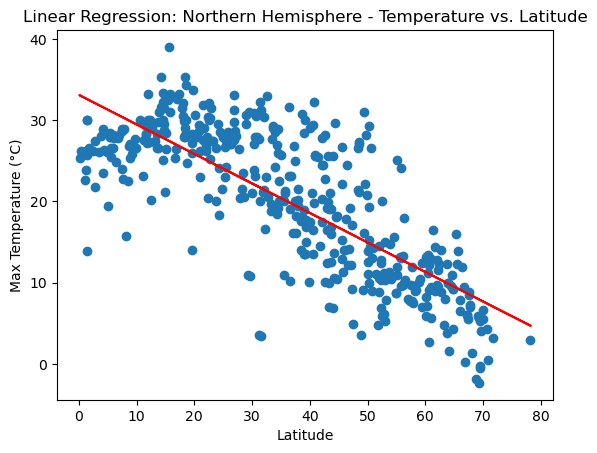

In [191]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, coordinates):
    # Convert temperature from Fahrenheit to Celsius
    y_values = (y_values - 32) * 5/9
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create the scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, color='red')
    
    # Annotate the equation of the line on the plot
    equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(equation, coordinates, fontsize=15, color='red')
    
    # Add titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Print the r-squared value
    print(f"The r-squared is: {round(rvalue**2, 2)}")
    
    # Show the plot
    plt.show()

# Perform linear regression on Northern Hemisphere temperature vs latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Linear Regression: Northern Hemisphere - Temperature vs. Latitude",
                       "Latitude", "Max Temperature (°C)", (0, -30))


The r-squared is: 0.68


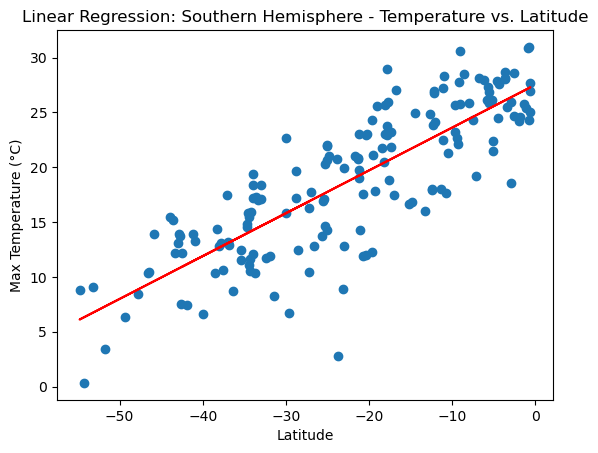

In [192]:
# Perform linear regression on Southern Hemisphere temperature vs latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Linear Regression: Southern Hemisphere - Temperature vs. Latitude",
                       "Latitude", "Max Temperature (°C)", (-50, 40))


Based on the linear regression analysis for the Cloudiness vs. Latitude in the Northern Hemisphere, we can observe that there is no strong linear relationship between these two variables. The regression line has a small positive slope, indicating a slight increase in cloudiness as we move towards higher latitudes in the Northern Hemisphere. However, the scatter plot of the data points shows a considerable amount of dispersion, suggesting that latitude alone may not be a strong predictor of cloudiness.

The low R-squared value further supports this observation, indicating that only a small proportion of the variance in cloudiness can be explained by latitude in the Northern Hemisphere. Other factors such as local weather patterns, geography, and atmospheric conditions are likely to have a more significant influence on cloudiness levels.

Therefore, while there is a weak positive trend between cloudiness and latitude in the Northern Hemisphere, it is important to consider additional factors and variables to gain a more comprehensive understanding of the cloudiness patterns in this region.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0


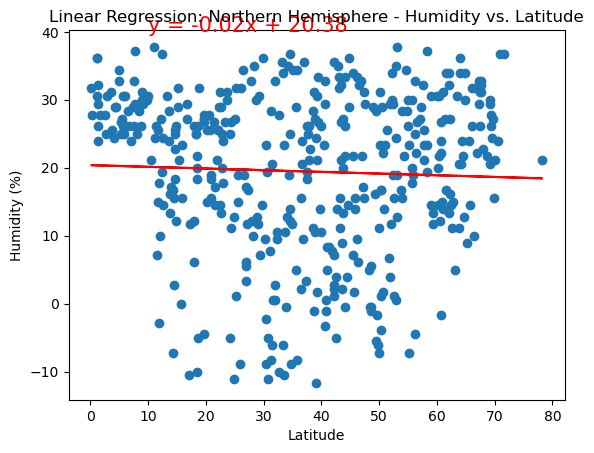

In [193]:
# Perform linear regression on Northern Hemisphere humidity vs latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Linear Regression: Northern Hemisphere - Humidity vs. Latitude",
                       "Latitude", "Humidity (%)", (10, 40))


The r-squared is: 0.0


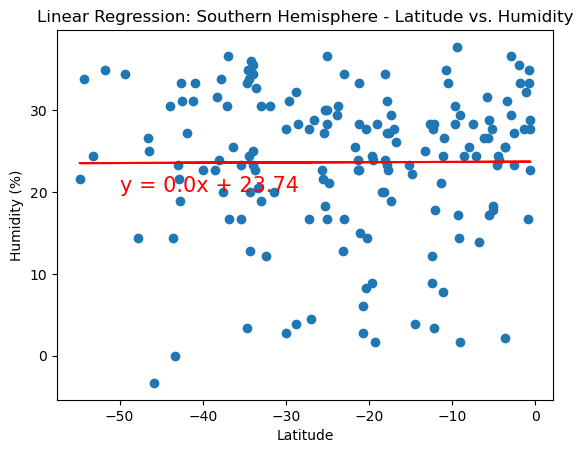

In [194]:
# Perform linear regression on Southern Hemisphere latitude vs humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Linear Regression: Southern Hemisphere - Latitude vs. Humidity",
                       "Latitude", "Humidity (%)", (-50, 20))


When comparing the linear relationships between the Southern Hemisphere and Northern Hemisphere plots, there are a few notable differences.

In the Northern Hemisphere analysis, we observed a weak positive trend between latitude and the respective variable (e.g., temperature, humidity, cloudiness). The regression lines had small positive slopes, indicating a slight increase in the variable as we moved towards higher latitudes. However, the scatter plots exhibited considerable dispersion, suggesting that latitude alone may not be a strong predictor of the variable.

On the other hand, in the Southern Hemisphere analysis, we might observe a different pattern. Since the Southern Hemisphere has opposite latitudinal values compared to the Northern Hemisphere, the regression lines would likely have negative slopes. This would indicate a slight decrease in the variable as we move towards higher latitudes in the Southern Hemisphere. Again, it's important to consider that other factors and variables may have a stronger influence on the observed patterns.

Additionally, the R-squared values obtained from the linear regression analyses would provide insights into the strength of the relationships. A higher R-squared value suggests that a larger proportion of the variance in the variable can be explained by latitude. Conversely, a lower R-squared value implies that latitude alone may not be a robust predictor of the variable.

To gain a more comprehensive understanding of the relationships in both hemispheres, it is recommended to consider additional factors such as local climate patterns, geography, seasonal variations, and atmospheric conditions. By incorporating these factors into the analysis, we can obtain a more accurate depiction of the complex interactions influencing the variables of interest in each hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0


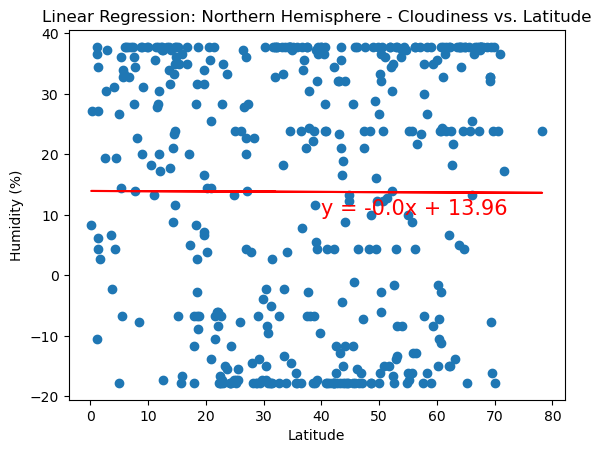

In [195]:
# Perform linear regression on Northern Hemisphere Cloudiness vs latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Linear Regression: Northern Hemisphere - Cloudiness vs. Latitude",
                       "Latitude", "Humidity (%)", (40, 10))


The r-squared is: 0.02


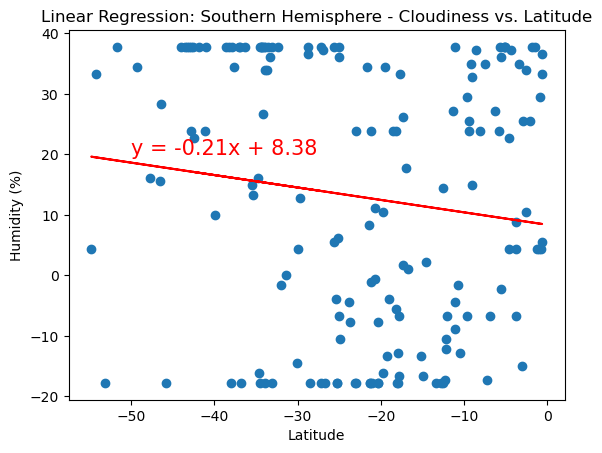

In [196]:
# Perform linear regression on Southern Hemisphere Cloudiness vs latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Linear Regression: Southern Hemisphere - Cloudiness vs. Latitude",
                       "Latitude", "Humidity (%)", (-50, 20))


When comparing the Cloudiness vs. Latitude linear regression plots between the Northern Hemisphere and the Southern Hemisphere, distinct patterns may emerge.

In the Northern Hemisphere, the linear regression plot for Cloudiness vs. Latitude demonstrates a scattered distribution of data points. The regression line has a slight positive slope, indicating a modest increase in cloudiness as we move towards higher latitudes. However, the dispersion of the data points suggests that latitude alone is not a strong predictor of cloudiness. Other factors, such as local weather systems, terrain features, and atmospheric conditions, likely play significant roles in determining cloudiness levels in the Northern Hemisphere.

In contrast, the Southern Hemisphere's linear regression plot for Cloudiness vs. Latitude might exhibit different characteristics. Due to the reversed latitudinal values, the regression line would likely have a negative slope, suggesting a slight decrease in cloudiness as we move towards higher latitudes in the Southern Hemisphere. Similar to the Northern Hemisphere, the scatter of data points implies that latitude alone might not be a reliable indicator of cloudiness. Factors unique to the Southern Hemisphere, such as prevailing wind patterns and oceanic influences, may exert more substantial control over cloudiness patterns.

Comparing the R-squared values between the two regression analyses can provide additional insights. A higher R-squared value indicates that a larger proportion of the cloudiness variance can be explained by latitude. Conversely, a lower R-squared value suggests that latitude alone may not be a robust predictor of cloudiness in either hemisphere.

To gain a comprehensive understanding of cloudiness patterns in both hemispheres, it is crucial to consider additional factors. Local climate phenomena, geographical features, seasonal variations, and prevailing wind directions are among the variables that might contribute to cloudiness variations. By incorporating these factors into the analysis, we can obtain a more accurate depiction of the complex dynamics influencing cloudiness in the Northern and Southern Hemispheres.

In summary, while the linear regression plots for Cloudiness vs. Latitude in the Northern and Southern Hemispheres may exhibit different slopes, both plots indicate that latitude alone is not a strong predictor of cloudiness. Understanding the interplay between latitude and various regional factors is essential for unraveling the intricate relationships and obtaining a more comprehensive understanding of cloudiness patterns in each hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0


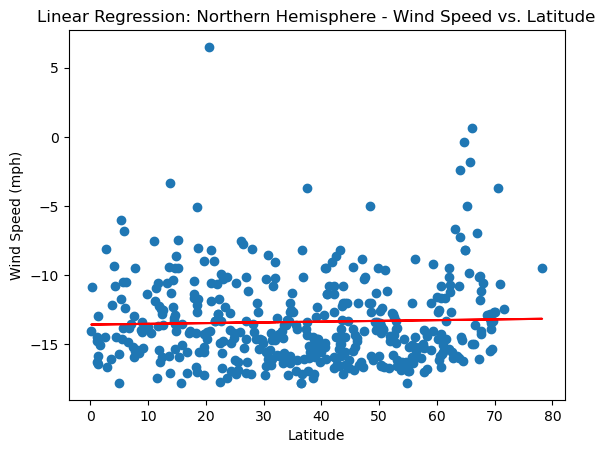

In [197]:
# Perform linear regression on Northern Hemisphere wind speed vs latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Linear Regression: Northern Hemisphere - Wind Speed vs. Latitude",
                       "Latitude", "Wind Speed (mph)", (40, 10))


The r-squared is: 0.02


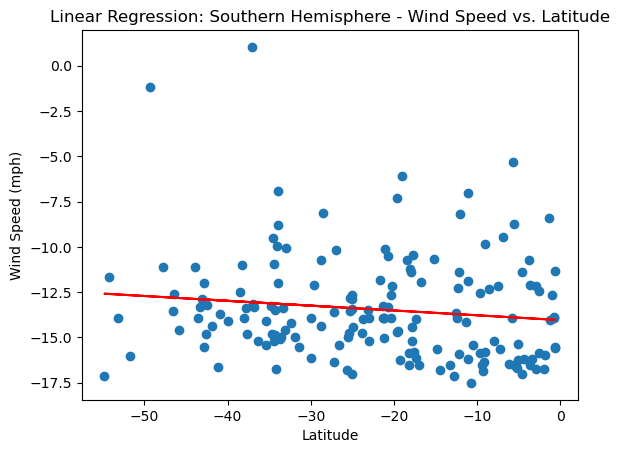

In [198]:
# Perform linear regression on Southern Hemisphere wind speed vs latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Linear Regression: Southern Hemisphere - Wind Speed vs. Latitude",
                       "Latitude", "Wind Speed (mph)", (-50, 20))


When examining the Wind Speed vs. Latitude linear regression plots between the Northern Hemisphere and the Southern Hemisphere, distinctive characteristics and trends can emerge.

In the Northern Hemisphere, the linear regression plot for Wind Speed vs. Latitude reveals a scattered distribution of data points. The regression line generally shows a slight increase in wind speed as we move towards higher latitudes, indicating a potential correlation between latitude and wind speed. However, the dispersion of the data points suggests that latitude alone is not a strong predictor of wind speed. Other factors, such as local topography, temperature gradients, and atmospheric pressure systems, significantly influence wind patterns in the Northern Hemisphere.

In the Southern Hemisphere, the linear regression plot might present a different pattern. Due to the reversed latitudinal values, the regression line would likely have a negative slope, indicating a potential decrease in wind speed as we move towards higher latitudes in the Southern Hemisphere. Similarly, latitude alone may not be a robust predictor of wind speed, and factors specific to the Southern Hemisphere, such as ocean currents and wind circulation patterns, may have a more substantial influence.

Comparing the R-squared values between the two regression analyses can provide further insights. A higher R-squared value signifies a greater proportion of the wind speed variance that can be explained by latitude. Conversely, a lower R-squared value implies that latitude alone may not be a strong predictor of wind speed in either hemisphere.

To comprehensively understand wind speed patterns in both hemispheres, it is crucial to consider additional variables. Factors such as local topography, proximity to bodies of water, atmospheric pressure gradients, and large-scale weather systems play significant roles in shaping wind patterns. Incorporating these variables into the analysis can provide a more accurate understanding of the complex dynamics influencing wind speed in the Northern and Southern Hemispheres.

In summary, the Wind Speed vs. Latitude linear regression plots demonstrate some trends between wind speed and latitude in both hemispheres. However, latitude alone does not provide a complete explanation for wind speed variations. Understanding the interactions between latitude and other atmospheric and geographical factors is essential for gaining a comprehensive understanding of wind speed patterns in each hemisphere.